# Chapter 3 Problem 8

(a)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
df = pd.read_csv('data/auto.csv')

In [31]:

df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
x_train = df['horsepower']
y_train = df['mpg']

In [14]:
x_train.head()

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object

In [15]:
y_train.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [16]:
x_train.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [44]:
drop_list = x_train[x_train == '?'].index
x_train = x_train.drop(drop_list)
y_train = y_train.drop(drop_list)
x_train = x_train.astype(float)

In [48]:
x_train.describe()


count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [49]:
y_train.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

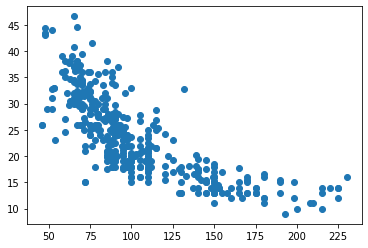

In [57]:
df2 = pd.DataFrame(data = {'Horsepower':x_train,'MPG':y_train})
df2.head()
plt.scatter(df2['Horsepower'],df2['MPG'])

In [62]:
model = smf.ols(formula = "MPG~Horsepower",data = df2)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           7.03e-81
Time:                        15:43:37   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

## i.

Yes. There is definitely a relationship between MPG and Horsepower. This is confirmed by the very large f-statistic of 599.7.

## ii.

Since the $R^2$ is 0.606 we can say that about 60% of the variance of MPG is explained by Horsepower.

## iii.

The relationship is negative as given by the slope coefficent of -0.1578.

## Part b.

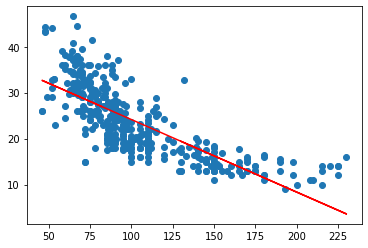

In [87]:

plt.scatter(x_train,y_train)
plt.plot(x_train,res.fittedvalues,color = 'red')